# Assignement 2 - Computational Social Media

The purpose of this work is to analyse the essential feature of some network data coming from Facebook. The emphasis will first be on user's statusesand the way they update it, and later in this work we will treat network features of those users.
<br>
<br>
<br>
<br>
*Santiago Saint-Supéry*

*Master in Digital Humanities. EPFL*

In [ ]:
#Importing the essential libraries for the work
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
#Importing the data
my_personality = pd.read_csv('mypersonality_final.csv', encoding = "ISO-8859-1")

Let us first take a look at the data and see what the basic statistical components are 

In [42]:
my_personality.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
count,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9.917000e+03,9917.000000,9917.000000,9.917000e+03,9917.000000,9916.000000
mean,3.354760,2.609453,3.616643,3.474201,4.130386,429.377120,1.354253e+05,94.665170,3.154012,1.376425e+05,0.489920,0.128821
std,0.857578,0.760248,0.682485,0.737215,0.585672,428.760382,1.994338e+05,5.506696,311.073343,2.013921e+05,0.011908,0.106063
min,1.330000,1.250000,1.650000,1.450000,2.250000,24.000000,9.325000e+01,0.040000,0.000000,4.900000e-01,0.180000,0.000000
25%,2.710000,2.000000,3.140000,3.000000,3.750000,196.000000,1.690220e+04,93.770000,0.010000,1.798200e+04,0.490000,0.060000
50%,3.400000,2.600000,3.650000,3.400000,4.250000,317.000000,4.716690e+04,96.440000,0.020000,4.868300e+04,0.490000,0.090000
75%,4.000000,3.050000,4.150000,4.000000,4.550000,633.000000,1.966060e+05,97.880000,0.030000,1.981860e+05,0.500000,0.170000
max,5.000000,4.750000,5.000000,5.000000,5.000000,29724.900000,1.251780e+06,99.820000,30978.000000,1.263790e+06,0.500000,0.630000


##### Remarks on the descriptive statistics 

By observing the basic statistical features of all parameters at once, it is difficult to point out meaningful information. For all the "sXXX" parameters, it seems that the distribution is similar however we will have to take a closer look at the data to fully understand what those characteristics are telling us.
<br>
<br>
<br>

## Question 3
Using the data, compute the following descriptive statistics 

• Total number of users - user level stats

• Total number of status updates – status level stats

• Status updates per user (Mean, Median, Min, Max, Std) - status level stats 

### Answer 3
We will make us of pandas functions to get the answers.

In [43]:
user_data = my_personality.groupby('#AUTHID').count()
print("The total number of users is {}" .format(len(user_data.index)))
print("The total number of status update is {}" .format(user_data.STATUS.sum()))

print("Descriptive statistics of status update per user:")
display(user_data['STATUS'].describe())

The total number of users is 250
The total number of status update is 9917
Descriptive statistics of status update per user:


count    250.000000
mean      39.668000
std       43.555875
min        1.000000
25%        8.000000
50%       25.000000
75%       54.750000
max      223.000000
Name: STATUS, dtype: float64

### Remarks on answer 3
One could point out that the number of status per user has a strong variability. Indeed it has a relatively high standard deviation. This must be because of certain values being very large. The maximum large gap between the third quartile and the maximum value indicates that the biggest quarter of values is quite spread. We will take a closer look at the repartition with the following violinplot.

Repartition of the number of status per user


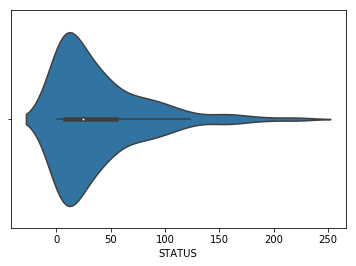

In [44]:
sns.violinplot(user_data['STATUS'])
print('Repartition of the number of status per user')

It reveals that there is a sort of long tail effect for the largest numbers of this feature. Most of the data is located around the average, and it is the highest values that cause this large standard deviation.
<br>
<br>
<br>
<br>



## Question 4
Compute the following descriptive temporal statistics:

• Time difference (deltas) (in hours) between consecutive status updates (Mean, Median, Min, Max, Std). Discard data from users that only have one status update. 

Compute this in 2 ways: 

    (a) At the status level: using all status updates as if they were independent (don’t mix data from different users to compute deltas!)

    (b) At the user level: first compute the mean time difference for each user separately, and then use the mean value as attribute of each user to compute mean, median, etc. 

    (c) How different are the various statistics from the 2 ways of doing it?

• Plot the histogram of timestamps of all status updates on a month-by-month basis to cover all the time period. Do you see any pattern?

### Answer 4
We will treat the two parts of the question in a separate way in order to understand how they differ.
### Answer 4. (a)

In this part part we will compute the time difference between all status updates as if they were independent.

Let us first compute the values of each users as if they were independent. To do so we calculate each difference per user and aggregate it as a whole

In [45]:
#Converting the dates into the right format
my_personality['DATE']= pd.to_datetime(my_personality['DATE'], errors='coerce')

In [53]:
#Computing the differences for each user
Authors_date_difference_a = my_personality.sort_values(['#AUTHID', 'DATE']).groupby('#AUTHID', as_index=False)['#AUTHID', 'DATE'].diff()
#Dropping the zero values, because they correspond to the change of user or to the case when a user has only one status
Authors_date_difference_a = Authors_date_difference_a.dropna(subset=['DATE'])
display(Authors_date_difference_a.describe())

,DATE
count,9666
mean,5 days 22:58:44.996896
std,19 days 02:24:37.958225
min,0 days 00:00:00
25%,0 days 18:55:00
50%,1 days 19:52:30
75%,4 days 13:31:15
max,366 days 00:43:00


### Comments on 4. (a)
The mean value is much smaller than the standard deviation, indicating that as for the number of status, the data has a high variability amongst users.

### Answer 4. (b)
We will now compute the mean value for each user and use this to compute the overall mean. 

In [91]:
#Computing the differences and the mean for each user
Authors_date_difference_b = pd.DataFrame(my_personality.sort_values(['#AUTHID', 'DATE']).groupby('#AUTHID', as_index=False)['DATE'].diff())

#Dropping the zeros
Authors_date_difference_b = Authors_date_difference_b.dropna(subset=['DATE'])

#Turning it into seconds to compute the mean value for each user
print('Descriptive statistics of the mean status update per user')
display(pd.to_timedelta(Authors_date_difference_b['DATE'].dt.seconds.mean(level=0).describe(), unit='s'))

Descriptive statistics of the mean status update per user


count          00:03:58
mean    11:23:21.396845
std     02:57:54.430223
min            01:09:00
25%     10:14:24.868421
50%     11:16:31.151961
75%            12:29:00
max            23:56:00
Name: DATE, dtype: timedelta64[ns]

### Comments on answer 4
The two ways to compute this feature lead to a very different result. The first way to compute the number gave as a much larger mean, and a big standard deviation. It is far from being the case when we come from user level. This is because of the the repartition of status updates. As it was highlighted in Question 3, there is a sort of long tail effect towards a big number of status updates. When computing it at user level at first, those numbers tend to be smoothened out becuase a user who is posting a lot will have the gap between its statuses counting less. For a user posting a lot, only the mean gap is considered when doing the 4. (b) method. On the other hand in question 4. (a), a user with many statuses will have each gap counting once, hence the fact that his/her updates will have a greater impact on the final mean gap. 

One could argue that those two ways to compute are in contradiction, however they do not mean the same thing. Computing the average gap will not illustrate much because it consideres in an equal manner parameters that do not have the same interest. The second method provides more insight because it reflects people's behavior in general. It gives insight on how people are behaving as individuals because there are less values to compute the final mean, but the mean per user is a much more robust data. 


#### Plotting the timestamps
Of all status updates on a month-by-month basis.

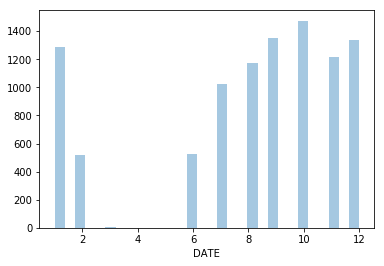

In [118]:
sns.distplot(my_personality.DATE.dt.month.dropna(), kde=False)

##### Commnents on the plot
Assuming that the data was not collected between the beginning of march and the end of may, one could argue that the repartition of posts is really unequal. Seeing this graph, it is hard to conlude on any trend of posting. June and February seem to be months during which people use the network much less, however the chaotic nature of the distribution pushes us to claim that no clear trend comes out of this data. 
<br>
<br>
<br>
<br>

## Question 5
Plot the cumulative distribution for:

    • number of status updates per user

    • Number of characters-per-message (at the status level)

    • Time difference between consecutive status updates (at the status level)

Depending on the specific variable to plot, use either a linear X axisor a logarithmic one.

### Answser 5
We will first plot the 3 components in a linear scale, and replot the ones that would be more meaningful with a logarithmic scale.

Cumulative distribution of the number of status per user:


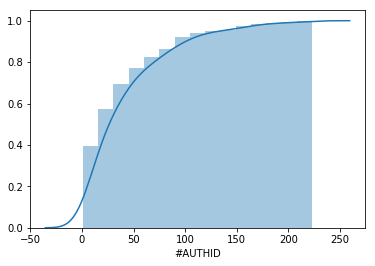

In [51]:
#Plotting the number of status per user
sns.distplot(my_personality['#AUTHID'].value_counts(),
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
print('Cumulative distribution of the number of status per user:')

Cumulative distribution of the number of character per message:


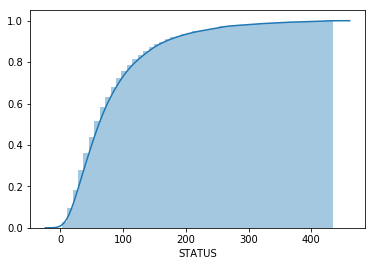

In [70]:
#Plotting the distribution of number of characters per message
sns.distplot(my_personality['STATUS'].str.len(),
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
print('Cumulative distribution of the number of character per message:')

Cumulative distribution of the time interval between statuses:


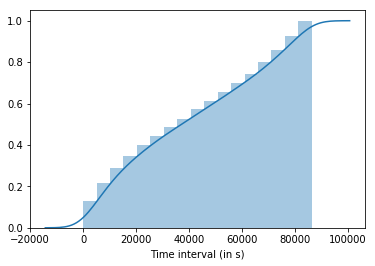

In [71]:
#Plotting the distribution of time intervals between statuses
sns.distplot(Authors_date_difference_b['DATE'].dt.seconds,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True), axlabel='Time interval (in s)')
print('Cumulative distribution of the time interval between statuses:')

### Comments on answer 5
One can see that the first two plots have a very fast growth for the smaller values, indicating that a logarithmic plot would represent the data in a more meaningful way. Let us plot the cumulative number of statuses and characters.


Cumulative distribution of the number of status per user:


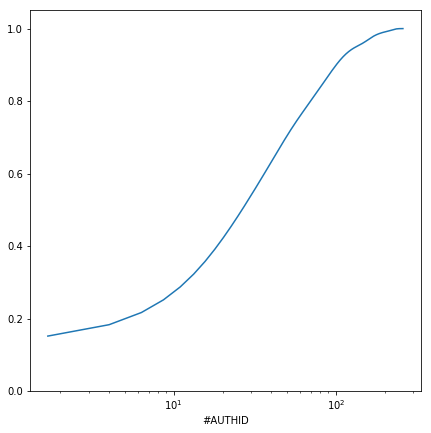

Cumulative distribution of the number of character per message:


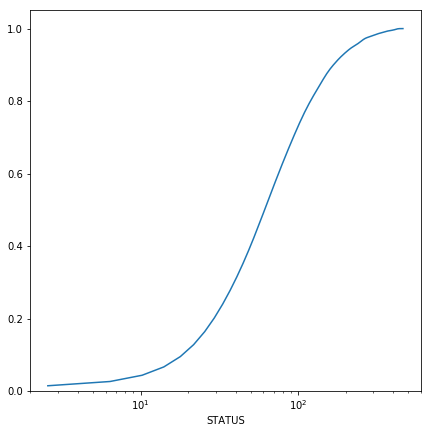

In [75]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.distplot(my_personality['#AUTHID'].value_counts(), hist=False,
             kde_kws=dict(cumulative=True), ax=ax)
print('Cumulative distribution of the number of status per user:')
plt.show()
plt.close()

f, ax1 = plt.subplots(figsize=(7, 7))
ax1.set(xscale="log")
sns.distplot(my_personality['STATUS'].str.len(),hist=False,
             kde_kws=dict(cumulative=True), ax=ax1)
print('Cumulative distribution of the number of character per message:')
plt.show()
plt.close()

The results are now much more understandable. One can point out that most statuses contain between 10 and 100 characters, and that most statuses are between the same range. On the other hand for the status posting interval, the cumulative distribution is almost linear. That intervals are quite spread within users. This was already pointed out in the previous question with Answer 4. (a) and the large standard deviation that we observed. This plot indicates that even though there are large differences inside the data, there isn't distinct clusters for those values and the intervals are quite spread.
<br>
<br>
<br>
<br>

## Question 6
Using the Network features:


• Generate descriptive statistics for each network feature per user (Mean, Median, Min, Max, Std) 


• Plot the cumulative distribution for each network feature per user.

### Answer 6

Let us first create a subest of the data in order to work with this object instead of the original dataframe.

In [77]:
Network_features = my_personality[['#AUTHID','NETWORKSIZE', 'BETWEENNESS',
                                   'NBETWEENNESS','DENSITY', 'BROKERAGE', 
                                   'NBROKERAGE', 'TRANSITIVITY']]
Network_features = Network_features.set_index('#AUTHID')

#Cleaning the DataFrame and getting rid of NaN values
Network_features = Network_features.dropna(how='any')

Descriptive statistics of NETWORKSIZE:


count    9916.000000
mean      426.422751
std       311.908261
min        24.000000
25%       196.000000
Name: NETWORKSIZE, dtype: float64

Cumulative distribution of NETWORKSIZE:


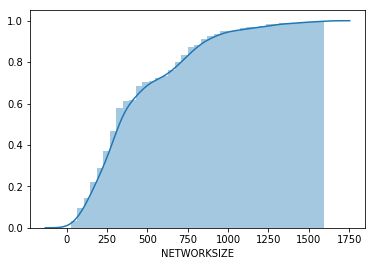

Descriptive statistics of BETWEENNESS:


count      9916.000000
mean     135438.963208
std      199439.229077
min         185.710000
25%       16902.200000
Name: BETWEENNESS, dtype: float64

Cumulative distribution of BETWEENNESS:


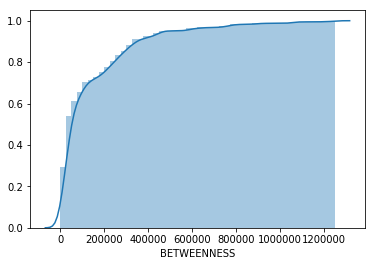

Descriptive statistics of NBETWEENNESS:


count    9916.000000
mean       94.674713
std         5.424353
min        31.210000
25%        93.770000
Name: NBETWEENNESS, dtype: float64

Cumulative distribution of NBETWEENNESS:


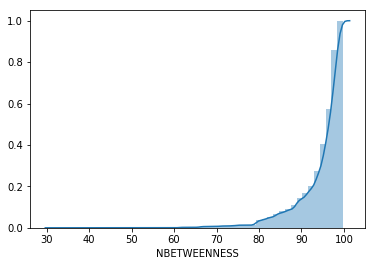

Descriptive statistics of DENSITY:


count    9916.000000
mean        0.030288
std         0.027709
min         0.000000
25%         0.010000
Name: DENSITY, dtype: float64

Cumulative distribution of DENSITY:


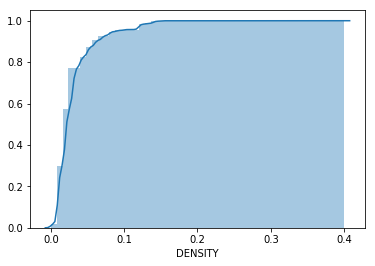

Descriptive statistics of BROKERAGE:


count      9916.000000
mean     137656.356999
std      201397.478019
min         241.000000
25%       17982.000000
Name: BROKERAGE, dtype: float64

Cumulative distribution of BROKERAGE:


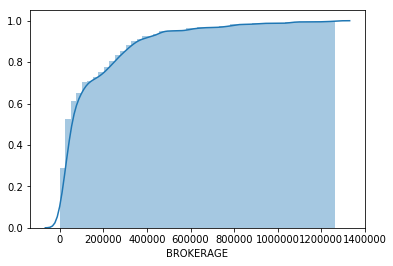

Descriptive statistics of NBROKERAGE:


count    9916.000000
mean        0.489952
std         0.011494
min         0.320000
25%         0.490000
Name: NBROKERAGE, dtype: float64

Cumulative distribution of NBROKERAGE:


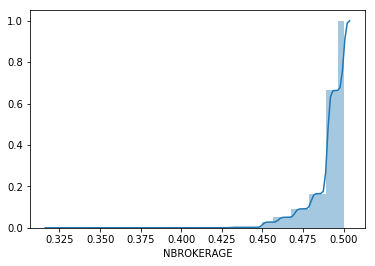

Descriptive statistics of TRANSITIVITY:


count    9916.000000
mean        0.128821
std         0.106063
min         0.000000
25%         0.060000
Name: TRANSITIVITY, dtype: float64

Cumulative distribution of TRANSITIVITY:


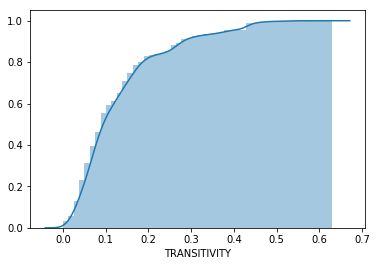

In [84]:
for column in Network_features.columns:
    print('Descriptive statistics of {}:'.format(column))
    display(Network_features[column].describe().head())
    sns.distplot(Network_features[column],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
    print('Cumulative distribution of {}:'.format(column))
    plt.show()
    plt.close()


One can see that the following parameters will have to be visualized with a logarithmic scale:
- Betweenness
- Brokerage

Here is the corrected representation:


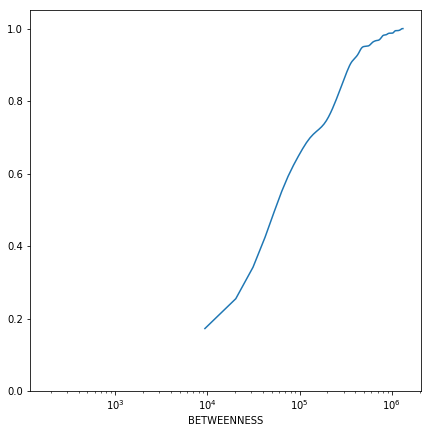

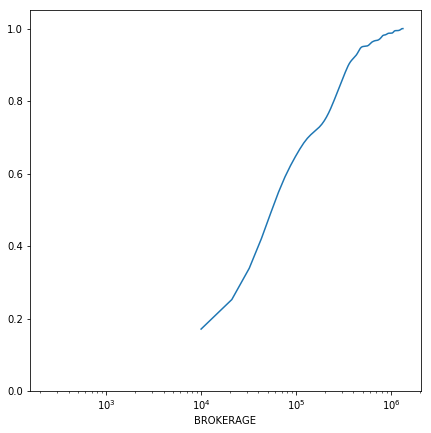

In [15]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.distplot(Network_features['BETWEENNESS'],
             hist_kws=dict(cumulative=False),
             kde_kws=dict(cumulative=True), ax=ax)

plt.show()
plt.close()

f, ax1 = plt.subplots(figsize=(7, 7))
ax1.set(xscale="log")
sns.distplot(Network_features['BROKERAGE'],
             hist_kws=dict(cumulative=False),
             kde_kws=dict(cumulative=True), ax=ax1)

plt.show()
plt.close()

### Comments on Question 6
There are 3 distinct types of repartitions that oen could point out. Firstly, the NETWORKSIZE and the TRANSITIVITY share a relatively smooth distribution. This means that the data is quite homogeneously spared between users. 

BROKERAGE and BETWEENNESS have a relatively alike logarithmic distribution, and this shows that most users have this feature between 10^4 and 10^6

### Question 7
Using the Personality trait  features:

• Generate descriptive statistics for each trait (Mean, Median, Min, Max, Std)  

• Plot the cumulative distribution for each big-5 trait.

### Answer 7

Grouping the data per user and then extracting the features

In [86]:
PersonalData = my_personality[['#AUTHID', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']]

PersonalData = PersonalData.set_index('#AUTHID')

#Cleaning the DataFrame and getting rid of NaN values
PersonalData = PersonalData.dropna(how='any')

Descriptive statistics of sEXT:


count    9917.000000
mean        3.354760
std         0.857578
min         1.330000
25%         2.710000
Name: sEXT, dtype: float64

Cumulative distribution of sEXT:


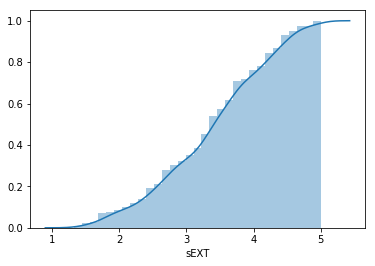

Descriptive statistics of sNEU:


count    9917.000000
mean        2.609453
std         0.760248
min         1.250000
25%         2.000000
Name: sNEU, dtype: float64

Cumulative distribution of sNEU:


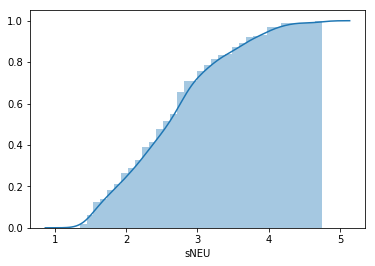

Descriptive statistics of sAGR:


count    9917.000000
mean        3.616643
std         0.682485
min         1.650000
25%         3.140000
Name: sAGR, dtype: float64

Cumulative distribution of sAGR:


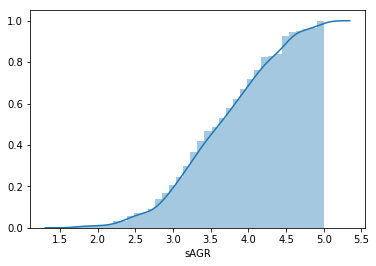

Descriptive statistics of sCON:


count    9917.000000
mean        3.474201
std         0.737215
min         1.450000
25%         3.000000
Name: sCON, dtype: float64

Cumulative distribution of sCON:


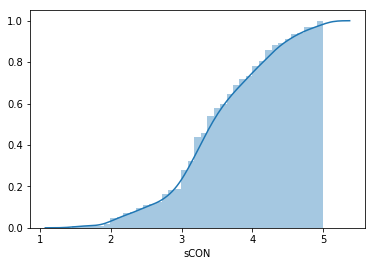

Descriptive statistics of sOPN:


count    9917.000000
mean        4.130386
std         0.585672
min         2.250000
25%         3.750000
Name: sOPN, dtype: float64

Cumulative distribution of sOPN:


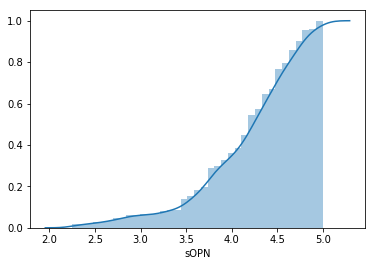

In [87]:
for column in PersonalData.columns:
    print('Descriptive statistics of {}:'.format(column))
    display(PersonalData[column].describe().head())
    sns.distplot(PersonalData[column],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
    print('Cumulative distribution of {}:'.format(column))
    plt.show()
    plt.close()

### Comments on answer 7
Amongst all those plots, none of them requires a logarithmic scale, they show the data in a clear manner. One can highlight the fact that those 5 traits share a very similar distribution. Indeed there is not one feature standing out from the others. This indicates that no personal trait is standing out on Facebook when looking at a group of people this large. To those features and work this way, one must scale down and look at a few number of users or look more closely than the cumulative distribution.

### General comments an conclusion

During this work, we were able to work with basic statistics on statuses and network properties of some Facebook users. This work was, for most of it, an analysis of descrptive statistics. Those elements gave us insight on how it is constructed, however a more complete analysis will come for later assignments. 